In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as mtick

import numpy as np
import folium
from folium.plugins import HeatMap
#import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, box
import shapely
#import fiona
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')

In [6]:
ls ../data/

538_approval_polllist.csv
538_approval_topline.csv
Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv
Public_Health_Statistics-_Selected_underlying_causes_of_death_in_Chicago__2006___2010.csv
TIF_Funding_Sources_and_Uses_by_TIF__Fiscal_Year__and_Type.csv
__pycache__/
data_processing.py
dkos18.csv
generic_polllist.csv*
generic_topline.csv*
pollster-ratings.csv
pollster-ratings_528csv.csv
raw-polls_528.csv
special-elections_538.csv
standardized_report.csv


In [7]:
# Read in Chicago TIF funding data
tifhist_df = pd.read_csv('../Data/TIF_Funding_Sources_and_Uses_by_TIF__Fiscal_Year__and_Type.csv')

In [8]:
tifhist_df.head()

,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
0,2002,T-111,105th/Vincennes,Revenues,Tax revenue,0
1,2009,T-111,105th/Vincennes,Revenues,Tax revenue,175776
2,2006,T-111,105th/Vincennes,Revenues,Tax revenue,130723
3,2001,T-111,105th/Vincennes,Revenues,Tax revenue,0
4,2007,T-111,105th/Vincennes,Revenues,Tax revenue,169551


In [9]:
# What types of income and expenditures?
tifhist_df.Type.unique()

array(['Revenues', 'Expenditures', 'Transfers',
       'Distributions to Taxing Districts', 'Other Funding Sources',
       'Other Uses'], dtype=object)

In [10]:
# What are the categories of TIF expenditures and revenue?
tifhist_df.Activity.unique()

array(['Tax revenue', 'Interest', 'Financing',
       'Land sales & rental revenue', 'Miscellaneous revenue',
       'Admin., studies & services', 'Site assembly & prep.',
       'Development', 'Public improvements', 'Job training',
       'Transfers in', 'Transfers out',
       'Distributions to taxing districts', 'Proceeds of debt'],
      dtype=object)

In [25]:
tifhist_df.shape

(9815, 6)

In [23]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0.5,1,'TIF District Finances')

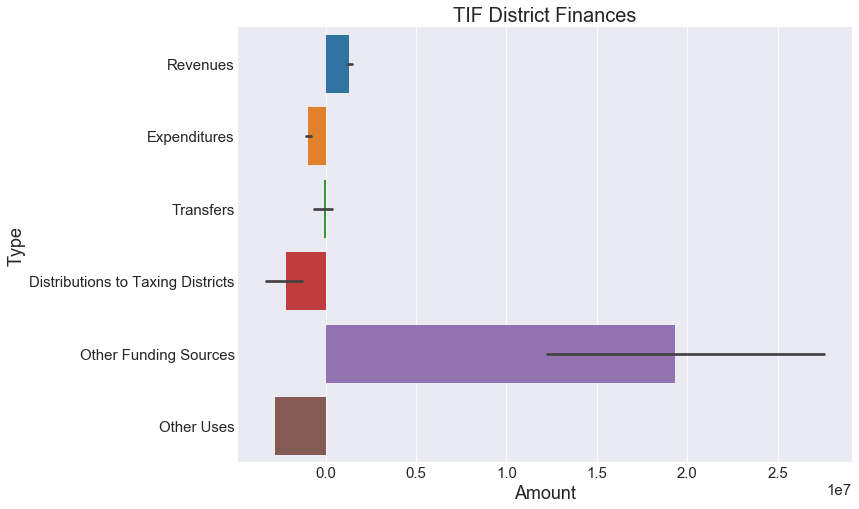

In [24]:
sns.barplot(tifhist_df['Amount'], tifhist_df['Type'])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)
plt.title("TIF District Finances", fontsize=20)

Text(0.5,1,'TIF District Expenditures & Revenue, By Frequency')

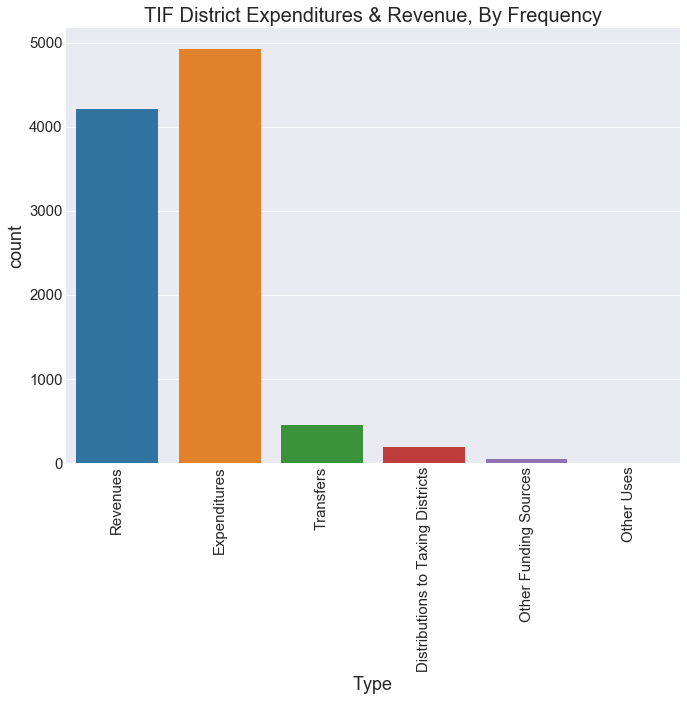

In [38]:
sns.countplot(tifhist_df['Type'])
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)
plt.title("TIF District Expenditures & Revenue, By Frequency", fontsize=20)

In [28]:
# Create a dataframe of JUST job training revenues and expenditures
job_train = tifhist_df.loc[tifhist_df['Activity']=='Job training']

In [30]:
# Sort by TIF
job_train.sort_values(by='TIF District').head()

,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
8085,2007,T-125,119th/I-57,Expenditures,Job training,-133401
8086,2008,T-125,119th/I-57,Expenditures,Job training,-106599
8087,2014,T-125,119th/I-57,Expenditures,Job training,-8500
8088,2005,T-072,24th/Michigan,Expenditures,Job training,-8894
8089,2004,T-072,24th/Michigan,Expenditures,Job training,-2


Text(0.5,1,'Distribution of TIF Job Training Expenditures')

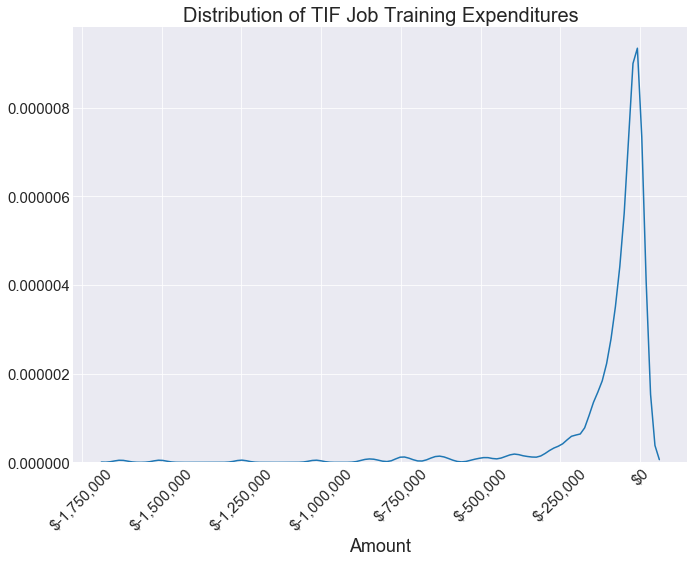

In [36]:
ax = sns.distplot(job_train.Amount, hist=False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)
plt.title("Distribution of TIF Job Training Expenditures", fontsize=20)

Text(0.5,1,'Revenues and expenditures by fiscal year')

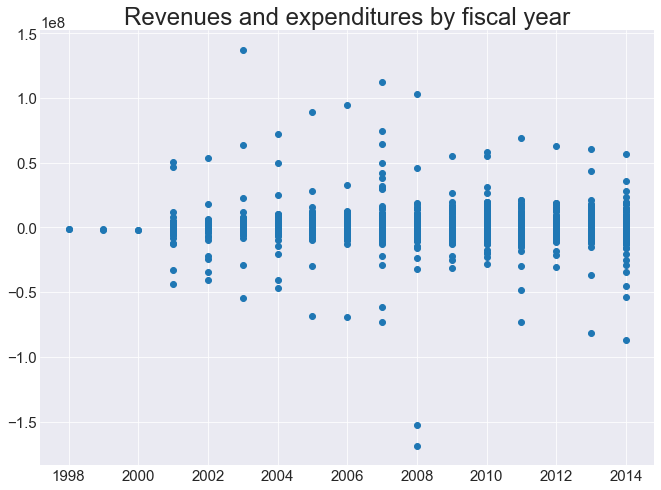

In [46]:
plt.scatter(x='Fiscal Year', y='Amount', data=tifhist_df)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)
plt.title('Revenues and expenditures by fiscal year', fontsize = 24)

Text(0.5,1,'Revenues and expenditures by fiscal year')

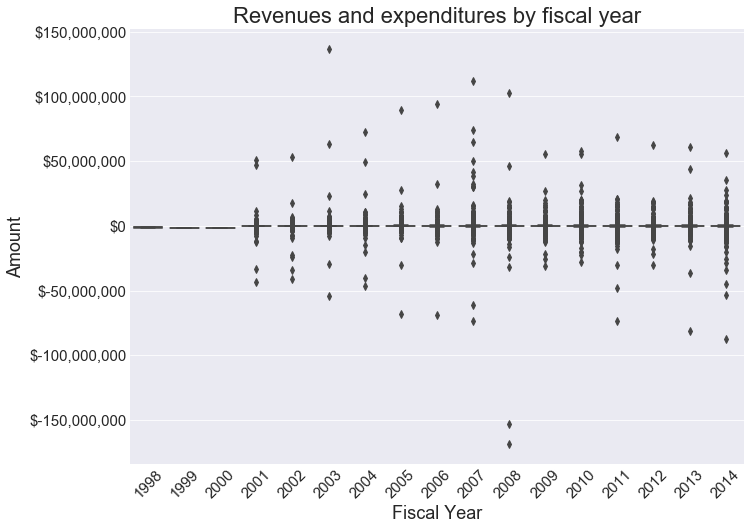

In [47]:
ax = sns.boxplot(x='Fiscal Year', y='Amount', data=tifhist_df)
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)

fig.set_size_inches(11, 8)
plt.title('Revenues and expenditures by fiscal year', fontsize=22)

Text(0.5,1,'Revenues and expenditures by fiscal year')

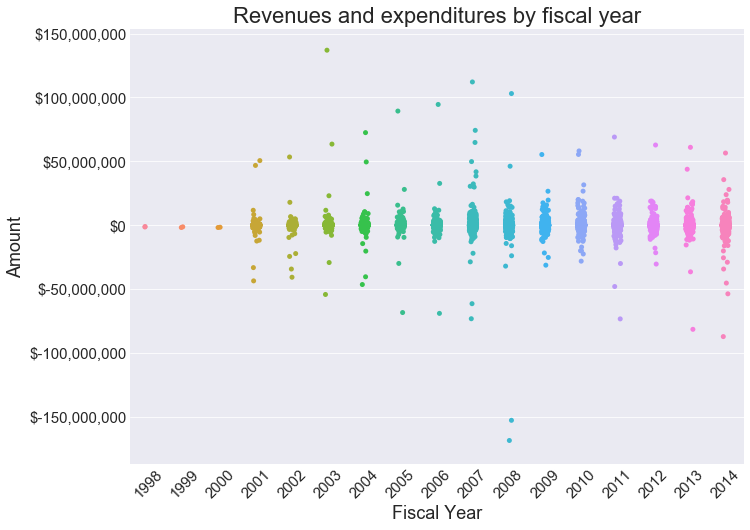

In [48]:
ax = sns.stripplot(x='Fiscal Year', y='Amount', data=tifhist_df, jitter=True)
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)

fig.set_size_inches(11, 8)
plt.title('Revenues and expenditures by fiscal year', fontsize=22)

In [50]:
# Create a dataframe with just TIF expenditures
expenditure = tifhist_df.loc[tifhist_df['Type']=='Expenditures']
expenditure.head()

,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
3928,2004,T-095,Midwest,Expenditures,Financing,-392000
4157,2014,T-095,Midwest,Expenditures,Financing,-2791983
4209,2006,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",-6279
4210,2003,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",-136
4211,2008,T-111,105th/Vincennes,Expenditures,"Admin., studies & services",-8252


Text(0.5,1,'Individual Expenditures by Fiscal Year')

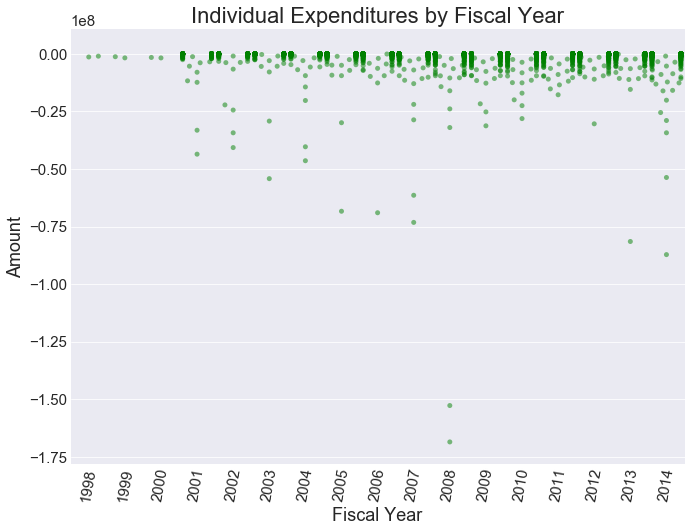

In [52]:
sns.swarmplot(x='Fiscal Year', y='Amount', data=expenditure, color='green', alpha=.5)
#sns.violinplot(x='Fiscal Year', y='Amount', data=expenditure, inner=None)
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 8)
plt.title('Individual Expenditures by Fiscal Year', fontsize=22)


In [53]:
# Make expenditures a positive value
expenditure.Amount = expenditure.Amount.apply(lambda x: x*-1)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0.5,1,'All Expenditures by Fiscal Year')

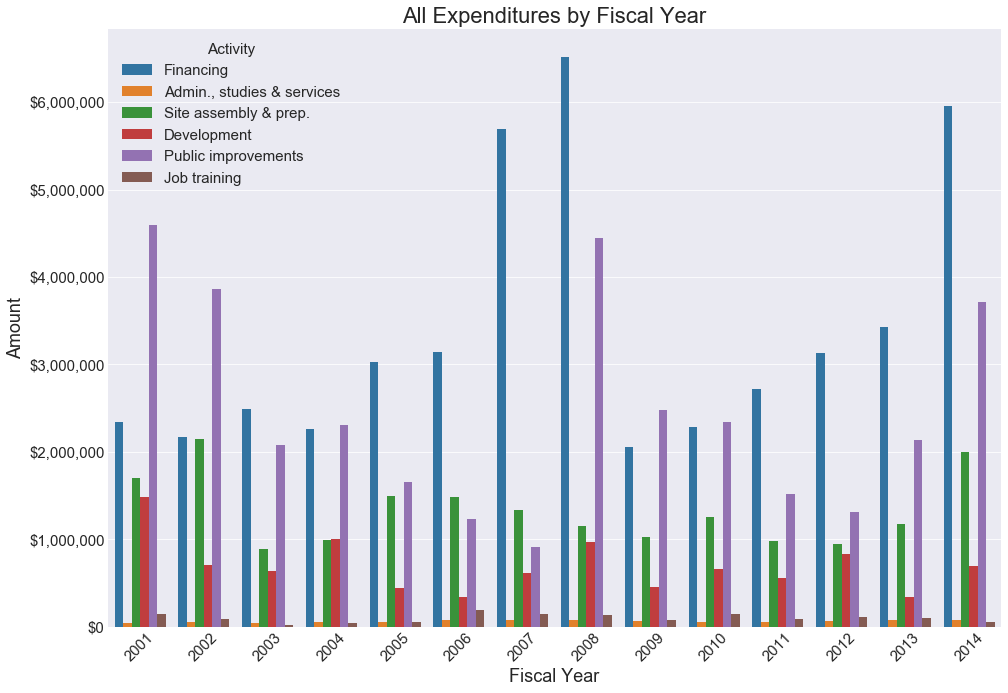

In [54]:
ax = sns.barplot(x='Fiscal Year', y='Amount', data=expenditure[expenditure['Fiscal Year']>2000], ci=None, hue='Activity')
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)

fig.set_size_inches(16, 11)
plt.title('All Expenditures by Fiscal Year', fontsize=22)

Text(0.5,1,'Expenditures by Activity Type')

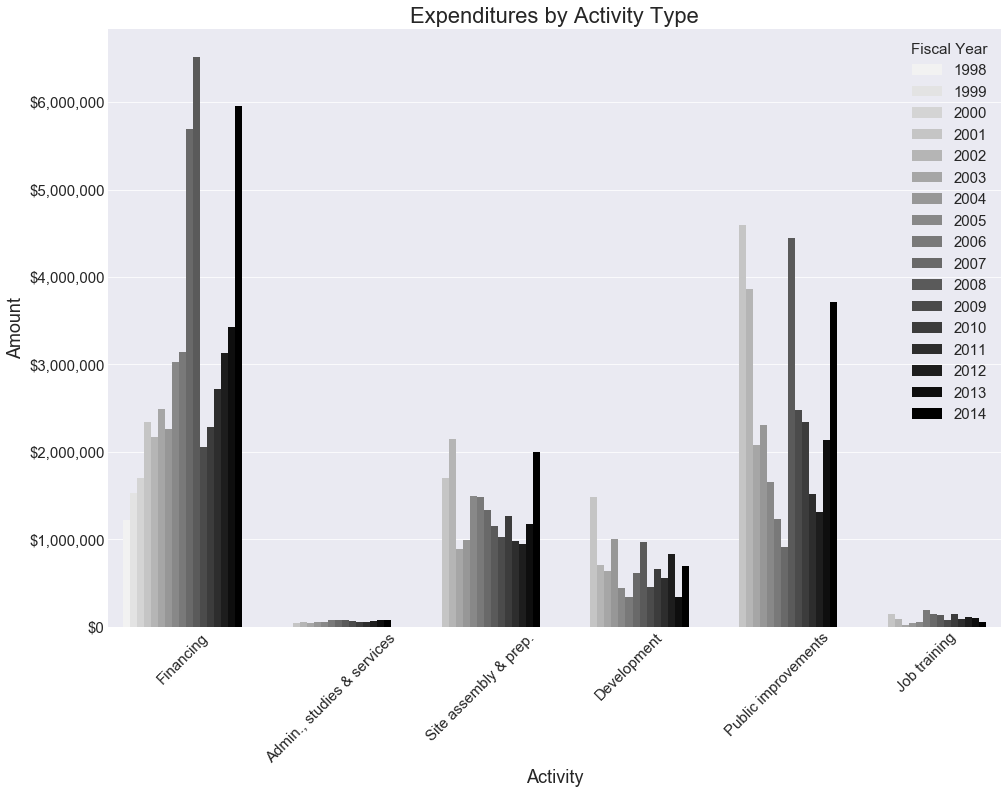

In [56]:
ax = sns.barplot(x='Activity', y='Amount', data=expenditure, hue='Fiscal Year', ci=None, color='black')
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)

fig.set_size_inches(16, 11)
plt.title('Expenditures by Activity Type', fontsize=22)

Text(0.5,1,'Expenditures by Activity Type')

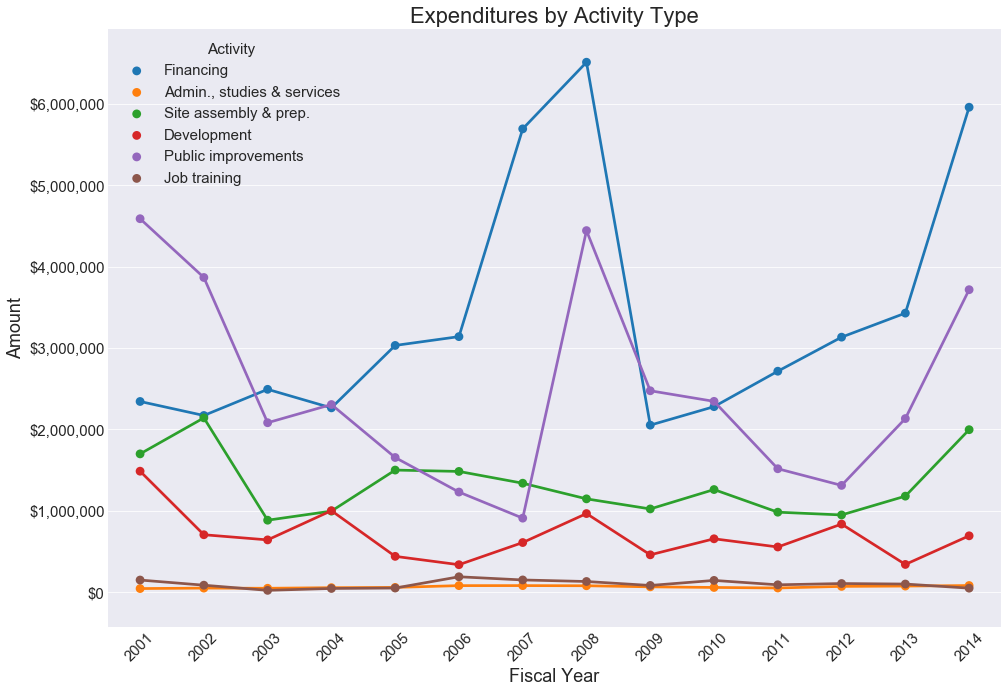

In [57]:
ax = sns.pointplot(x='Fiscal Year', y='Amount', data=expenditure[expenditure['Fiscal Year']>2000], hue='Activity', ci=None, units='Amount')
plt.xticks(rotation=80)
fig = matplotlib.pyplot.gcf()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)

fig.set_size_inches(16, 11)
plt.title('Expenditures by Activity Type', fontsize=22)

Text(0.5,1,'Job Training Expenditures by Year')

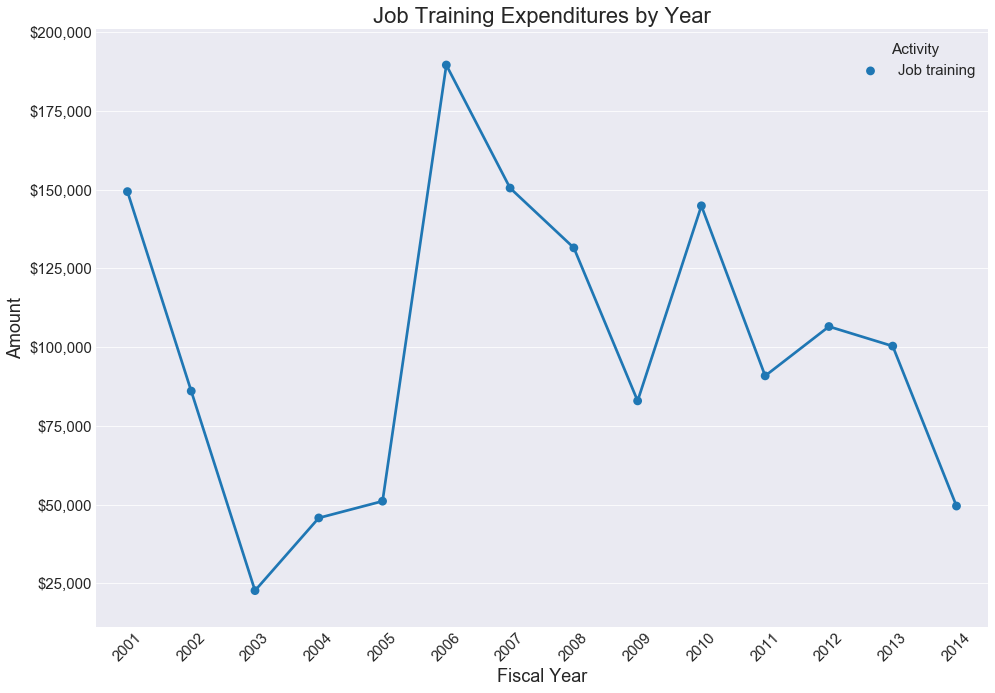

In [59]:
ax = sns.pointplot(x='Fiscal Year', y='Amount', data=expenditure[expenditure['Activity']=='Job training'], 
            hue='Activity', ci=None)
fig = matplotlib.pyplot.gcf()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)

fig.set_size_inches(16, 11)
plt.title('Job Training Expenditures by Year', fontsize=22)

In [61]:
# Make expenditures a positive value.
job_train['Amount'] = job_train['Amount'].apply(lambda x: x*-1)
job_train.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Fiscal Year,TIF Number,TIF District,Type,Activity,Amount
8085,2007,T-125,119th/I-57,Expenditures,Job training,133401
8086,2008,T-125,119th/I-57,Expenditures,Job training,106599
8087,2014,T-125,119th/I-57,Expenditures,Job training,8500
8088,2005,T-072,24th/Michigan,Expenditures,Job training,8894
8089,2004,T-072,24th/Michigan,Expenditures,Job training,2


Text(0.5,1,'Job Training Expenditures By TIF District')

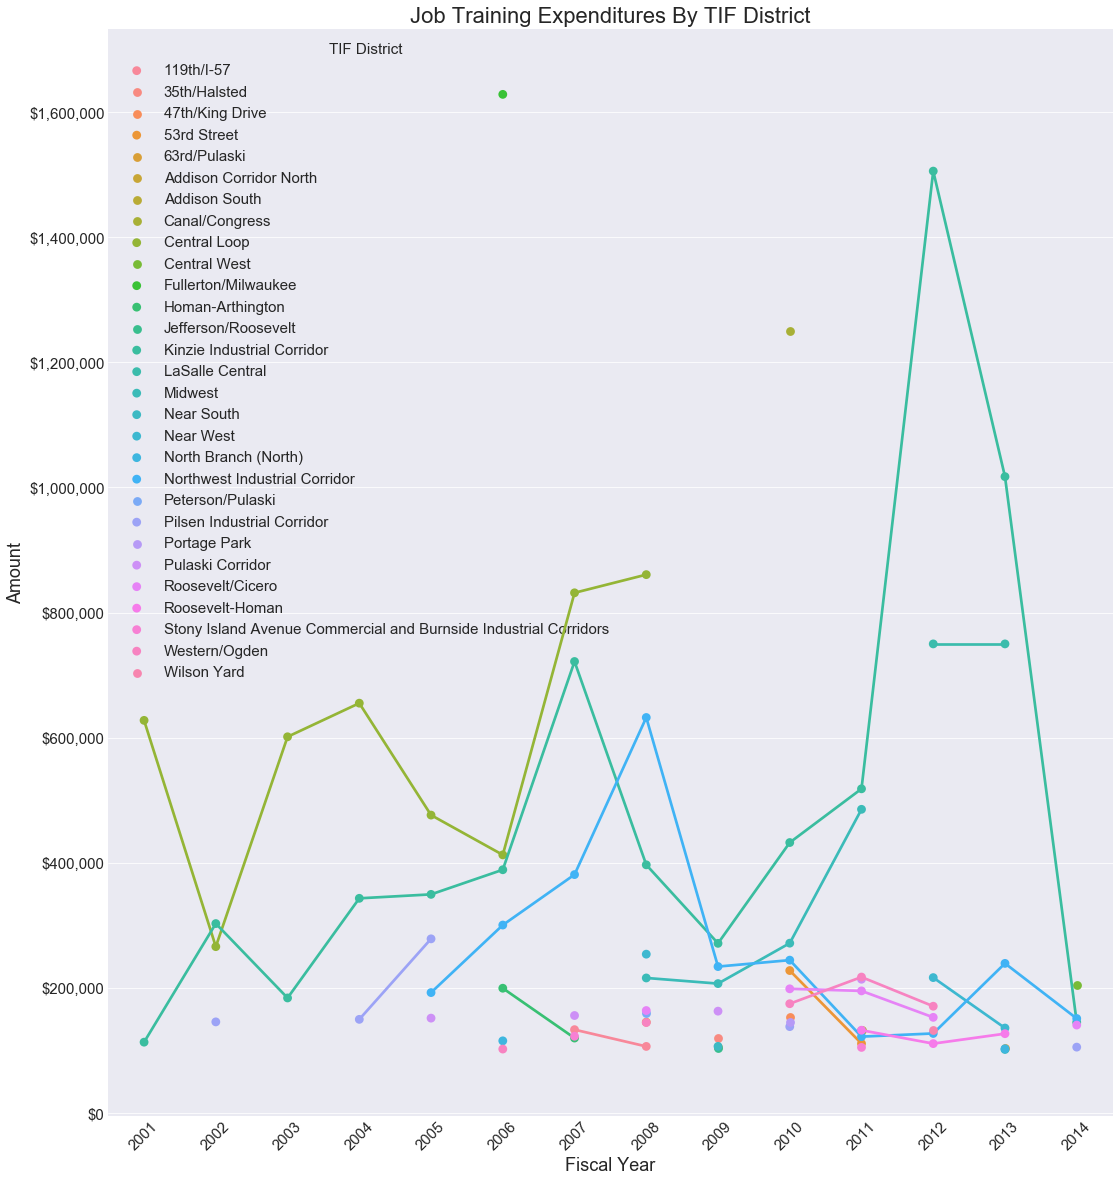

In [65]:
ax = sns.pointplot('Fiscal Year', 'Amount', data=job_train[job_train['Amount']>100000], hue='TIF District')
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=45)

fig.set_size_inches(18, 20)
plt.title('Job Training Expenditures By TIF District', fontsize=22)

In [220]:
job_train.columns

Index(['Fiscal Year', 'TIF Number', 'TIF District', 'Type', 'Activity',
       'Amount'],
      dtype='object')

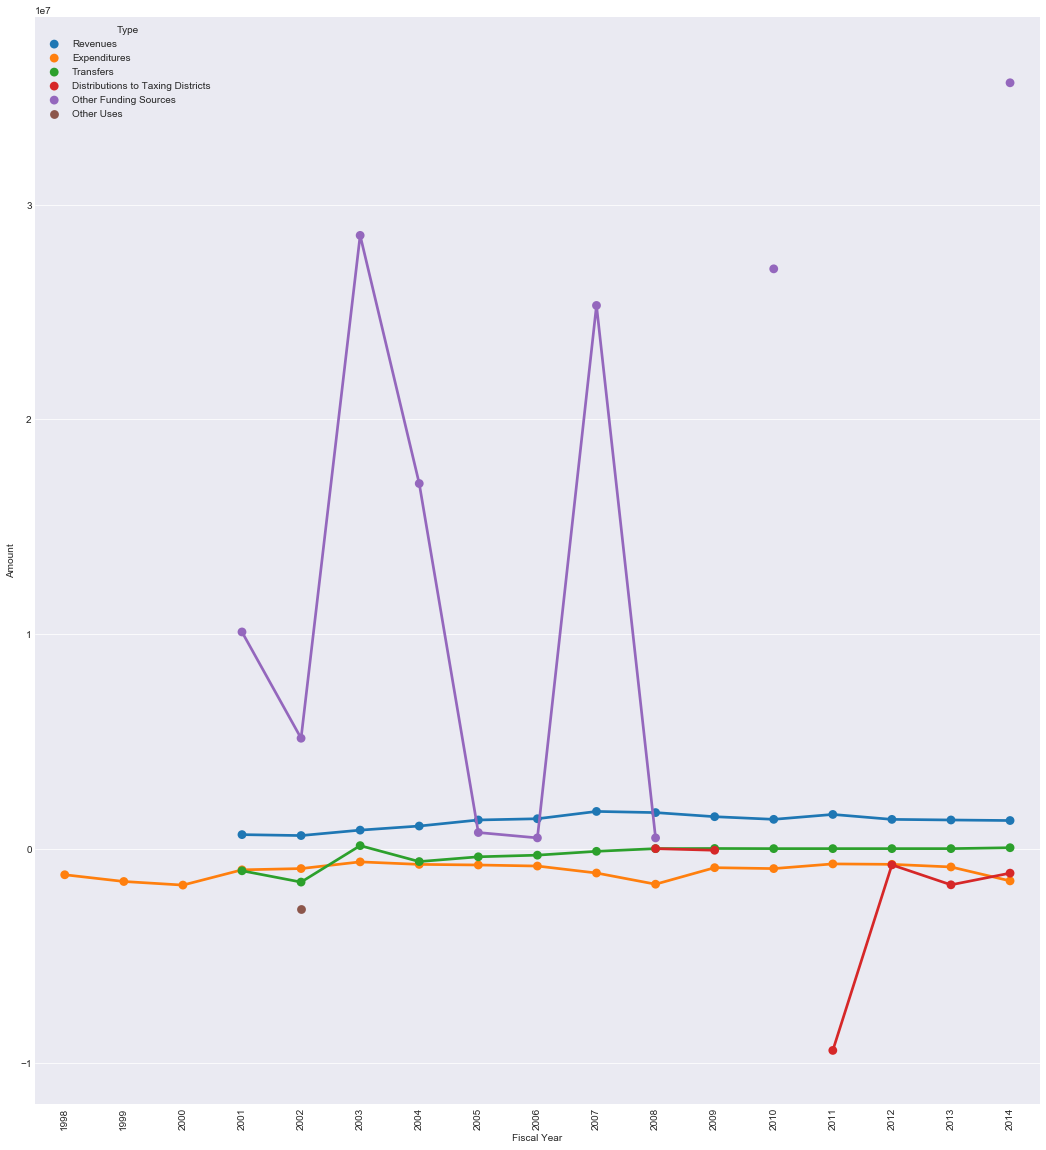

In [221]:
sns.pointplot(x='Fiscal Year', y='Amount', hue='Type', data=tifhist_df, units='Amount', ci=None)
plt.plot(y=0)
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 20)

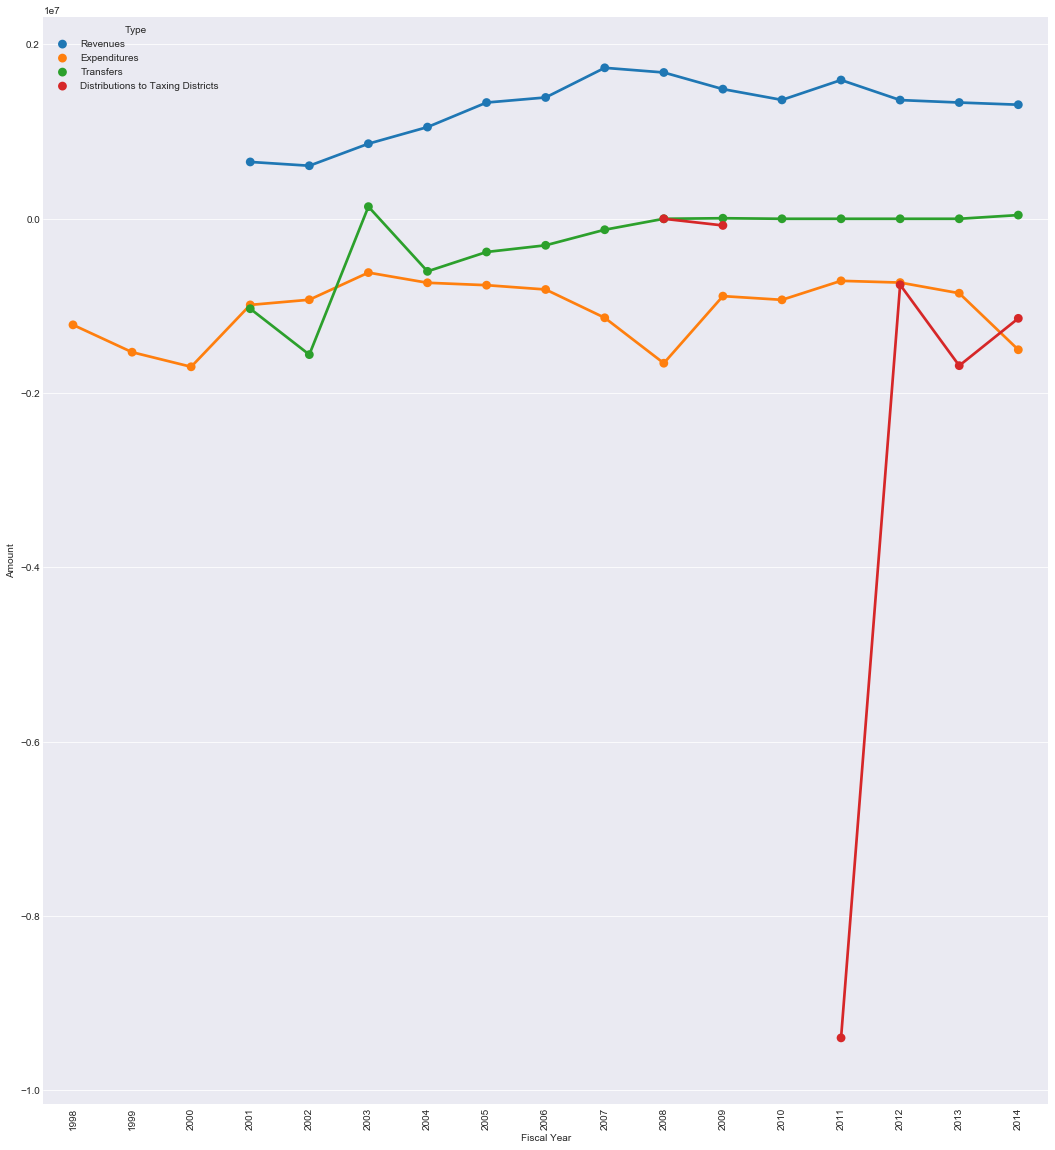

In [232]:
sns.pointplot(x='Fiscal Year', y='Amount', hue='Type', 
              data=tifhist_df[tifhist_df['Type'].isin(['Revenues', 'Expenditures', 'Transfers',
       'Distributions to Taxing Districts',])], 
                              units='Amount', ci=None)
plt.plot(y=0)
plt.xticks(rotation=90)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 20)

In [230]:
tifhist_df.Type.unique()

array(['Revenues', 'Expenditures', 'Transfers',
       'Distributions to Taxing Districts', 'Other Funding Sources',
       'Other Uses'], dtype=object)